In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

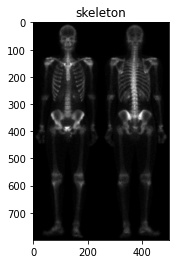

In [2]:
img = cv2.imread("images/skeleton.tif")
plt.imshow(img, cmap='gray')
plt.title('skeleton')
plt.show()

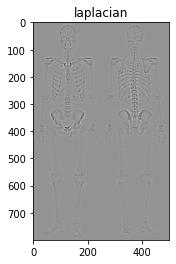

In [3]:
lap = cv2.Laplacian(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), cv2.CV_64F, ksize=5)
plt.imshow(lap, cmap='gray')
plt.title('laplacian')
plt.show()

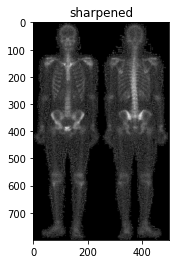

In [4]:
res =  cv2.addWeighted(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),0.7,lap.astype(np.uint8),0.3,0)
plt.imshow(res, cmap='gray')
plt.title('sharpened')
plt.show()

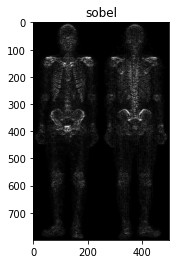

In [5]:
s = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
x, y = cv2.Sobel(s,cv2.CV_16S,2,0), cv2.Sobel(s,cv2.CV_16S,0,1)
sobel = cv2.convertScaleAbs(cv2.subtract(x,y))
plt.imshow(sobel, cmap="gray")
plt.title("sobel")
plt.show()

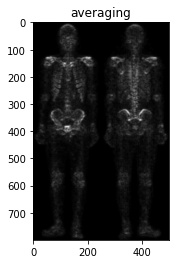

In [6]:
kernel = np.ones((5, 5),np.uint8)/25
avg = cv2.filter2D(sobel,-1,kernel)
plt.imshow(avg, cmap="gray")
plt.title('averaging')
plt.show()

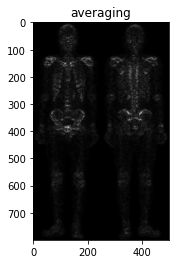

In [7]:
mask = cv2.bitwise_and(avg, res)
plt.imshow(mask, cmap="gray")
plt.title('averaging')
plt.show()

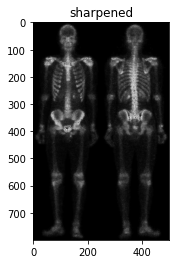

In [8]:
sharpened = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) + mask
plt.imshow(sharpened, cmap="gray")
plt.title('sharpened')
plt.show()

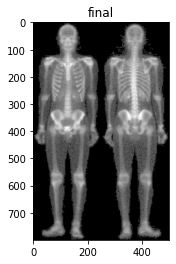

In [9]:
final = np.array(255*(img/255)**0.3,dtype='uint8')
plt.imshow(final, cmap="gray")
plt.title('final')
plt.show()

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f21415471f0>)

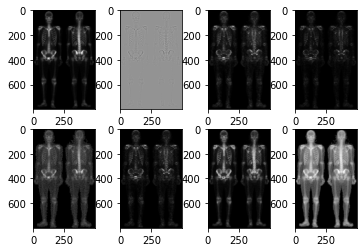

In [10]:
plt.subplot(2, 4, 1), plt.imshow(img, 'gray')
plt.subplot(2, 4, 2), plt.imshow(lap, 'gray')
plt.subplot(2, 4, 5), plt.imshow(res, 'gray')
plt.subplot(2, 4, 6), plt.imshow(sobel, 'gray')
plt.subplot(2, 4, 3), plt.imshow(avg, 'gray')
plt.subplot(2, 4, 4), plt.imshow(mask, 'gray')
plt.subplot(2, 4, 7), plt.imshow(sharpened, 'gray')
plt.subplot(2, 4, 8), plt.imshow(final, 'gray')
